In [1]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
from cvzone.FaceDetectionModule import FaceDetector
from cvzone.FaceMeshModule import FaceMeshDetector
import os

In [13]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

def mark_faces(photo_path):
    image = cv2.imread(photo_path)
    
    faces= DeepFace.extract_faces(img_path = image)

    for i in range(len(faces)):
        x, y, w, h = faces[i]["facial_area"]["x"], faces[i]["facial_area"]["y"], faces[i]["facial_area"]["w"], faces[i]["facial_area"]["h"]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  

    RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return RGBimage

output = mark_faces("ClassPhoto.jpeg")


In [16]:
cv2.imwrite("output.jpeg" ,output)



True

### Verify Image function to check if the person is same

In [18]:
def verify(img1 , img2):
    verify = DeepFace.verify(img1,img2)
    return verify["verified"]

### Result of verification

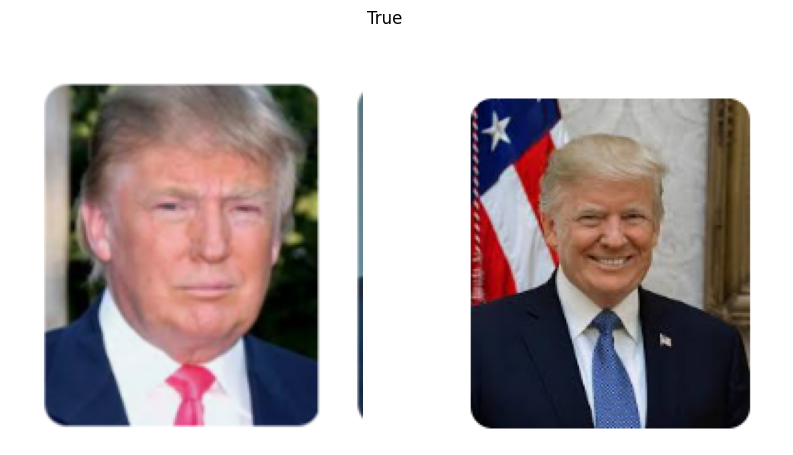

In [19]:

trump1 = plt.imread("Test Images/trump1.png")
trump2 = plt.imread("Test Images/trump2.png")


plt.figure(figsize=(10, 5)) 


plt.subplot(1, 2, 1)
plt.imshow(trump1)
plt.axis('off')  

plt.subplot(1, 2, 2)
plt.imshow(trump2)
plt.axis('off')  

plt.suptitle(verify("Test Images/trump1.png" , "Test Images/trump2.png"))

plt.show()


### Function to analyze image based on (AGE , GENDER ,RACE , EMOTION)

In [20]:

def analyze_face(face_img):
    analysis = DeepFace.analyze(face_img, actions=['age', 'gender', 'race', 'emotion'], enforce_detection=False)
    age = analysis[0]["age"]
    gender = max(analysis[0]["gender"], key=analysis[0]["gender"].get)
    race = max(analysis[0]["race"], key=analysis[0]["race"].get)
    emotion = max(analysis[0]["emotion"], key=analysis[0]["emotion"].get)

    return age , gender ,race , emotion


In [21]:
a,b,c,d =analyze_face("Test Images/img1.jpg")
print(a,b,c,d)

Action: emotion: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]

34 Man white sad


### Face Analysis on Example image

In [22]:
detector = FaceDetector()

path ="Test Images/faces.webp"

final = cv2.imread(path)
im = cv2.imread(path)
im, bboxs = detector.findFaces(im)


for bbox in bboxs:
    x, y, w, h = bbox['bbox']

    face_img = final[y:y+h, x:x+w]
    age, gender , race , emotion = analyze_face(face_img) 


    cv2.putText(final, f'Age: {age}', (x, y - 40), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)
    cv2.putText(final, f'Gender: {gender}', (x, y - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
    cv2.putText(final, f'Race: {race}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)
    cv2.putText(final, f'Emotion: {emotion}', (x, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)


    cv2.rectangle(final, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow("Image", final)


cv2.waitKey(0)
cv2.destroyAllWindows()

Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


(-0.5, 594.5, 322.5, -0.5)

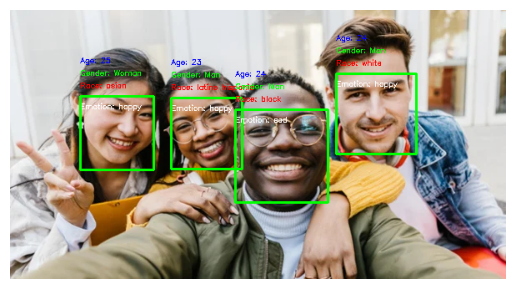

In [23]:
finalRGB = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
plt.imshow(finalRGB)
plt.axis("off")

### Face analysis using Webcam

In [25]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame, bboxs = detector.findFaces(frame , draw=False)

    for bbox in bboxs:
        x, y, w, h = bbox['bbox']
        
        face_img = frame[y:y+h, x:x+w]
        
        try:

            age, gender, race, emotion = analyze_face(face_img)

            cv2.putText(frame, f'Age: {age}', (x, y - 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            cv2.putText(frame, f'Gender: {gender}', (x, y - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            cv2.putText(frame, f'Race: {race}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            cv2.putText(frame, f'Emotion: {emotion}', (x, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        except:
            # If analysis fails (e.g., due to face being too small), skip this face
            pass

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Webcam", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


(-0.5, 639.5, 479.5, -0.5)

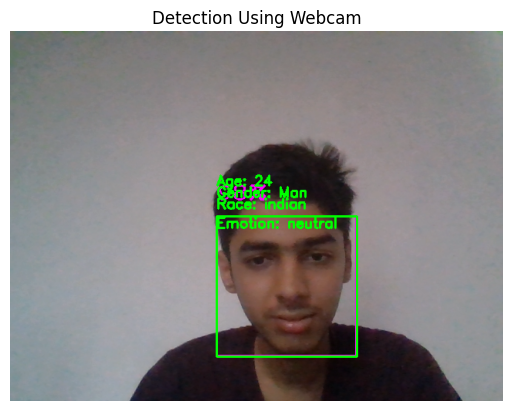

In [26]:
finalRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(finalRGB)
plt.title("Detection Using Webcam")
plt.axis("off")

### Function to crop Detected images and store in a directory

In [19]:
def crop_detected(image , directory = "Detected"):
    detector = FaceDetector()
    image = cv2.imread(image)

    if not os.path.exists(directory):
        os.makedirs(directory)

    im, bboxs = detector.findFaces(image , draw=False)

    for bbox in bboxs:
        x,y,w,h = bbox['bbox']
        current_face = image[y:y+h, x:x+w]

        file_path = os.path.join(directory, f"IMG{bbox['id']+1}.jpg")
        
        cv2.imwrite(file_path , current_face)
        print(f"Saved in {file_path}")

crop_detected("Test Images/faces.webp")




Saved in Detected\IMG1.jpg
Saved in Detected\IMG2.jpg
Saved in Detected\IMG3.jpg
Saved in Detected\IMG4.jpg


### Face Mesh Usage on image

In [8]:
mesh = FaceMeshDetector(maxFaces=10)

image = cv2.imread("faces.webp")

image, faces = mesh.findFaceMesh(image, draw=True)

if faces:
    print(f"Number of faces detected: {len(faces)}")
    for i, face in enumerate(faces):
        print(f"Details of face {i+1}:")
        print(f" - Nose tip: {face[1]}")
        print(f" - Left eye: {face[133]}")
        print(f" - Right eye: {face[362]}")
        print(f" - Mouth left corner: {face[61]}")
        print(f" - Mouth right corner: {face[291]}\n")
else:
    print("No faces detected")

cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of faces detected: 4
Details of face 1:
 - Nose tip: [145, 150]
 - Left eye: [134, 123]
 - Right eye: [153, 126]
 - Mouth left corner: [115, 152]
 - Mouth right corner: [153, 159]

Details of face 2:
 - Nose tip: [233, 153]
 - Left eye: [217, 137]
 - Right eye: [236, 131]
 - Mouth left corner: [222, 169]
 - Mouth right corner: [258, 157]

Details of face 3:
 - Nose tip: [442, 132]
 - Left eye: [425, 103]
 - Right eye: [447, 100]
 - Mouth left corner: [420, 141]
 - Mouth right corner: [458, 138]

Details of face 4:
 - Nose tip: [330, 163]
 - Left eye: [313, 145]
 - Right eye: [342, 144]
 - Mouth left corner: [299, 187]
 - Mouth right corner: [360, 187]



(-0.5, 594.5, 322.5, -0.5)

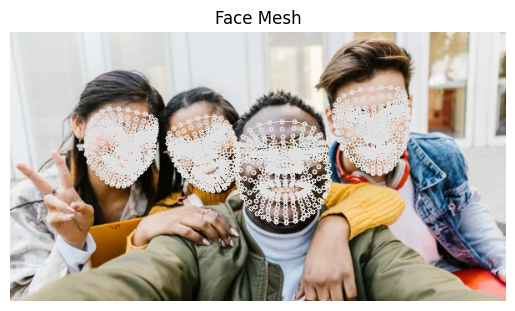

In [5]:
finalRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(finalRGB)
plt.title("Face Mesh")
plt.axis("off")

### Face Mesh on Webcam

In [10]:
cap = cv2.VideoCapture(0)
cap.set(400,400)

while True:
    success , frame = cap.read()
    frame , faces = mesh.findFaceMesh(frame)

    cv2.imshow("Webcam FaceMesh" , frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Result

(-0.5, 639.5, 479.5, -0.5)

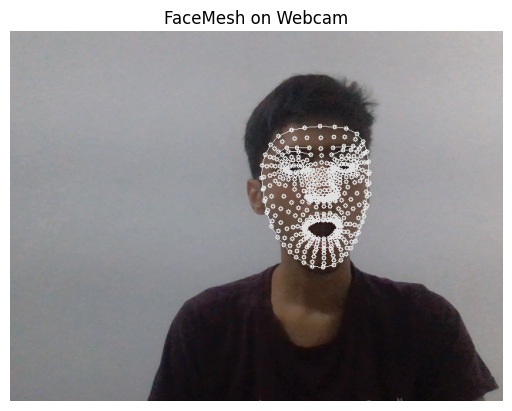

In [12]:
finalRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(finalRGB)
plt.title("FaceMesh on Webcam")
plt.axis("off")